# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [3]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [4]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [5]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

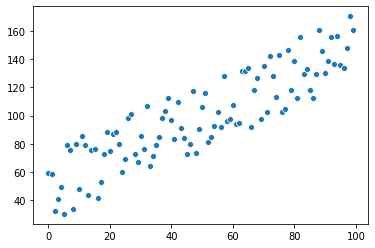

In [6]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 483.427608
Iteration 1 | Cost: 480.152522
Iteration 2 | Cost: 477.062096
Iteration 3 | Cost: 474.145616
Iteration 4 | Cost: 471.392987
Iteration 5 | Cost: 468.794701
Iteration 6 | Cost: 466.341803
Iteration 7 | Cost: 464.025857
Iteration 8 | Cost: 461.838915
Iteration 9 | Cost: 459.773492
Iteration 10 | Cost: 457.822538
Iteration 11 | Cost: 455.979411
Iteration 12 | Cost: 454.237853
Iteration 13 | Cost: 452.591973
Iteration 14 | Cost: 451.036219
Iteration 15 | Cost: 449.565362
Iteration 16 | Cost: 448.174476
Iteration 17 | Cost: 446.858922
Iteration 18 | Cost: 445.614329
Iteration 19 | Cost: 444.436581
Iteration 20 | Cost: 443.321800
Iteration 21 | Cost: 442.266332
Iteration 22 | Cost: 441.266738
Iteration 23 | Cost: 440.319777
Iteration 24 | Cost: 439.422394
Iteration 25 | Cost: 438.571715
Iteration 26 | Cost: 437.765030
Iteration 27 | Cost: 436.999789
Iteration 28 | Cost: 436.273586
Iteration 29 | Cost: 435.584159
Iteration 30 | Cost: 434.929374
Iteration 31 | Cos

Iteration 1670 | Cost: 305.790661
Iteration 1671 | Cost: 305.734243
Iteration 1672 | Cost: 305.677843
Iteration 1673 | Cost: 305.621460
Iteration 1674 | Cost: 305.565095
Iteration 1675 | Cost: 305.508746
Iteration 1676 | Cost: 305.452415
Iteration 1677 | Cost: 305.396100
Iteration 1678 | Cost: 305.339803
Iteration 1679 | Cost: 305.283523
Iteration 1680 | Cost: 305.227260
Iteration 1681 | Cost: 305.171014
Iteration 1682 | Cost: 305.114786
Iteration 1683 | Cost: 305.058574
Iteration 1684 | Cost: 305.002380
Iteration 1685 | Cost: 304.946203
Iteration 1686 | Cost: 304.890042
Iteration 1687 | Cost: 304.833899
Iteration 1688 | Cost: 304.777773
Iteration 1689 | Cost: 304.721664
Iteration 1690 | Cost: 304.665573
Iteration 1691 | Cost: 304.609498
Iteration 1692 | Cost: 304.553440
Iteration 1693 | Cost: 304.497400
Iteration 1694 | Cost: 304.441376
Iteration 1695 | Cost: 304.385370
Iteration 1696 | Cost: 304.329380
Iteration 1697 | Cost: 304.273408
Iteration 1698 | Cost: 304.217452
Iteration 1699

Iteration 3381 | Cost: 230.541215
Iteration 3382 | Cost: 230.507706
Iteration 3383 | Cost: 230.474207
Iteration 3384 | Cost: 230.440718
Iteration 3385 | Cost: 230.407240
Iteration 3386 | Cost: 230.373771
Iteration 3387 | Cost: 230.340313
Iteration 3388 | Cost: 230.306865
Iteration 3389 | Cost: 230.273428
Iteration 3390 | Cost: 230.240000
Iteration 3391 | Cost: 230.206583
Iteration 3392 | Cost: 230.173176
Iteration 3393 | Cost: 230.139779
Iteration 3394 | Cost: 230.106392
Iteration 3395 | Cost: 230.073015
Iteration 3396 | Cost: 230.039648
Iteration 3397 | Cost: 230.006292
Iteration 3398 | Cost: 229.972946
Iteration 3399 | Cost: 229.939610
Iteration 3400 | Cost: 229.906284
Iteration 3401 | Cost: 229.872968
Iteration 3402 | Cost: 229.839663
Iteration 3403 | Cost: 229.806367
Iteration 3404 | Cost: 229.773082
Iteration 3405 | Cost: 229.739806
Iteration 3406 | Cost: 229.706541
Iteration 3407 | Cost: 229.673286
Iteration 3408 | Cost: 229.640042
Iteration 3409 | Cost: 229.606807
Iteration 3410

Iteration 5287 | Cost: 182.078139
Iteration 5288 | Cost: 182.059383
Iteration 5289 | Cost: 182.040634
Iteration 5290 | Cost: 182.021890
Iteration 5291 | Cost: 182.003151
Iteration 5292 | Cost: 181.984419
Iteration 5293 | Cost: 181.965692
Iteration 5294 | Cost: 181.946971
Iteration 5295 | Cost: 181.928255
Iteration 5296 | Cost: 181.909545
Iteration 5297 | Cost: 181.890841
Iteration 5298 | Cost: 181.872143
Iteration 5299 | Cost: 181.853450
Iteration 5300 | Cost: 181.834763
Iteration 5301 | Cost: 181.816082
Iteration 5302 | Cost: 181.797406
Iteration 5303 | Cost: 181.778736
Iteration 5304 | Cost: 181.760072
Iteration 5305 | Cost: 181.741413
Iteration 5306 | Cost: 181.722760
Iteration 5307 | Cost: 181.704113
Iteration 5308 | Cost: 181.685472
Iteration 5309 | Cost: 181.666836
Iteration 5310 | Cost: 181.648205
Iteration 5311 | Cost: 181.629581
Iteration 5312 | Cost: 181.610962
Iteration 5313 | Cost: 181.592349
Iteration 5314 | Cost: 181.573741
Iteration 5315 | Cost: 181.555139
Iteration 5316

Iteration 7227 | Cost: 154.597626
Iteration 7228 | Cost: 154.587237
Iteration 7229 | Cost: 154.576851
Iteration 7230 | Cost: 154.566467
Iteration 7231 | Cost: 154.556087
Iteration 7232 | Cost: 154.545710
Iteration 7233 | Cost: 154.535337
Iteration 7234 | Cost: 154.524966
Iteration 7235 | Cost: 154.514599
Iteration 7236 | Cost: 154.504234
Iteration 7237 | Cost: 154.493873
Iteration 7238 | Cost: 154.483515
Iteration 7239 | Cost: 154.473161
Iteration 7240 | Cost: 154.462809
Iteration 7241 | Cost: 154.452460
Iteration 7242 | Cost: 154.442115
Iteration 7243 | Cost: 154.431773
Iteration 7244 | Cost: 154.421434
Iteration 7245 | Cost: 154.411098
Iteration 7246 | Cost: 154.400765
Iteration 7247 | Cost: 154.390436
Iteration 7248 | Cost: 154.380109
Iteration 7249 | Cost: 154.369786
Iteration 7250 | Cost: 154.359466
Iteration 7251 | Cost: 154.349149
Iteration 7252 | Cost: 154.338835
Iteration 7253 | Cost: 154.328524
Iteration 7254 | Cost: 154.318216
Iteration 7255 | Cost: 154.307912
Iteration 7256

Iteration 8929 | Cost: 140.795672
Iteration 8930 | Cost: 140.789485
Iteration 8931 | Cost: 140.783299
Iteration 8932 | Cost: 140.777115
Iteration 8933 | Cost: 140.770932
Iteration 8934 | Cost: 140.764752
Iteration 8935 | Cost: 140.758574
Iteration 8936 | Cost: 140.752397
Iteration 8937 | Cost: 140.746223
Iteration 8938 | Cost: 140.740050
Iteration 8939 | Cost: 140.733879
Iteration 8940 | Cost: 140.727710
Iteration 8941 | Cost: 140.721543
Iteration 8942 | Cost: 140.715378
Iteration 8943 | Cost: 140.709214
Iteration 8944 | Cost: 140.703053
Iteration 8945 | Cost: 140.696893
Iteration 8946 | Cost: 140.690736
Iteration 8947 | Cost: 140.684580
Iteration 8948 | Cost: 140.678426
Iteration 8949 | Cost: 140.672274
Iteration 8950 | Cost: 140.666123
Iteration 8951 | Cost: 140.659975
Iteration 8952 | Cost: 140.653829
Iteration 8953 | Cost: 140.647684
Iteration 8954 | Cost: 140.641541
Iteration 8955 | Cost: 140.635400
Iteration 8956 | Cost: 140.629261
Iteration 8957 | Cost: 140.623124
Iteration 8958

Iteration 10680 | Cost: 132.396233
Iteration 10681 | Cost: 132.392602
Iteration 10682 | Cost: 132.388973
Iteration 10683 | Cost: 132.385344
Iteration 10684 | Cost: 132.381717
Iteration 10685 | Cost: 132.378090
Iteration 10686 | Cost: 132.374465
Iteration 10687 | Cost: 132.370841
Iteration 10688 | Cost: 132.367218
Iteration 10689 | Cost: 132.363596
Iteration 10690 | Cost: 132.359975
Iteration 10691 | Cost: 132.356355
Iteration 10692 | Cost: 132.352737
Iteration 10693 | Cost: 132.349119
Iteration 10694 | Cost: 132.345503
Iteration 10695 | Cost: 132.341888
Iteration 10696 | Cost: 132.338273
Iteration 10697 | Cost: 132.334660
Iteration 10698 | Cost: 132.331048
Iteration 10699 | Cost: 132.327437
Iteration 10700 | Cost: 132.323828
Iteration 10701 | Cost: 132.320219
Iteration 10702 | Cost: 132.316611
Iteration 10703 | Cost: 132.313005
Iteration 10704 | Cost: 132.309399
Iteration 10705 | Cost: 132.305795
Iteration 10706 | Cost: 132.302192
Iteration 10707 | Cost: 132.298590
Iteration 10708 | Co

Iteration 12413 | Cost: 127.506232
Iteration 12414 | Cost: 127.504090
Iteration 12415 | Cost: 127.501948
Iteration 12416 | Cost: 127.499807
Iteration 12417 | Cost: 127.497667
Iteration 12418 | Cost: 127.495528
Iteration 12419 | Cost: 127.493389
Iteration 12420 | Cost: 127.491251
Iteration 12421 | Cost: 127.489113
Iteration 12422 | Cost: 127.486976
Iteration 12423 | Cost: 127.484840
Iteration 12424 | Cost: 127.482705
Iteration 12425 | Cost: 127.480570
Iteration 12426 | Cost: 127.478435
Iteration 12427 | Cost: 127.476302
Iteration 12428 | Cost: 127.474169
Iteration 12429 | Cost: 127.472036
Iteration 12430 | Cost: 127.469905
Iteration 12431 | Cost: 127.467774
Iteration 12432 | Cost: 127.465643
Iteration 12433 | Cost: 127.463514
Iteration 12434 | Cost: 127.461385
Iteration 12435 | Cost: 127.459256
Iteration 12436 | Cost: 127.457128
Iteration 12437 | Cost: 127.455001
Iteration 12438 | Cost: 127.452875
Iteration 12439 | Cost: 127.450749
Iteration 12440 | Cost: 127.448624
Iteration 12441 | Co

Iteration 14370 | Cost: 124.347508
Iteration 14371 | Cost: 124.346328
Iteration 14372 | Cost: 124.345148
Iteration 14373 | Cost: 124.343968
Iteration 14374 | Cost: 124.342788
Iteration 14375 | Cost: 124.341609
Iteration 14376 | Cost: 124.340431
Iteration 14377 | Cost: 124.339252
Iteration 14378 | Cost: 124.338074
Iteration 14379 | Cost: 124.336897
Iteration 14380 | Cost: 124.335720
Iteration 14381 | Cost: 124.334543
Iteration 14382 | Cost: 124.333366
Iteration 14383 | Cost: 124.332190
Iteration 14384 | Cost: 124.331014
Iteration 14385 | Cost: 124.329839
Iteration 14386 | Cost: 124.328664
Iteration 14387 | Cost: 124.327489
Iteration 14388 | Cost: 124.326314
Iteration 14389 | Cost: 124.325140
Iteration 14390 | Cost: 124.323967
Iteration 14391 | Cost: 124.322793
Iteration 14392 | Cost: 124.321620
Iteration 14393 | Cost: 124.320448
Iteration 14394 | Cost: 124.319276
Iteration 14395 | Cost: 124.318104
Iteration 14396 | Cost: 124.316932
Iteration 14397 | Cost: 124.315761
Iteration 14398 | Co

Iteration 16407 | Cost: 122.555350
Iteration 16408 | Cost: 122.554715
Iteration 16409 | Cost: 122.554081
Iteration 16410 | Cost: 122.553446
Iteration 16411 | Cost: 122.552812
Iteration 16412 | Cost: 122.552178
Iteration 16413 | Cost: 122.551544
Iteration 16414 | Cost: 122.550910
Iteration 16415 | Cost: 122.550277
Iteration 16416 | Cost: 122.549643
Iteration 16417 | Cost: 122.549010
Iteration 16418 | Cost: 122.548377
Iteration 16419 | Cost: 122.547744
Iteration 16420 | Cost: 122.547112
Iteration 16421 | Cost: 122.546479
Iteration 16422 | Cost: 122.545847
Iteration 16423 | Cost: 122.545215
Iteration 16424 | Cost: 122.544583
Iteration 16425 | Cost: 122.543952
Iteration 16426 | Cost: 122.543320
Iteration 16427 | Cost: 122.542689
Iteration 16428 | Cost: 122.542058
Iteration 16429 | Cost: 122.541427
Iteration 16430 | Cost: 122.540797
Iteration 16431 | Cost: 122.540166
Iteration 16432 | Cost: 122.539536
Iteration 16433 | Cost: 122.538906
Iteration 16434 | Cost: 122.538276
Iteration 16435 | Co

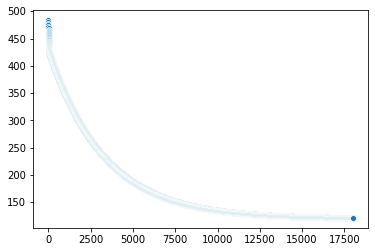

In [10]:
numEpochs= 18000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise